In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Community resilence

In [11]:
df_com_res_raw = pd.read_csv("cre-2018-a11.csv")
df_com_res_raw.head(3)

,state,county,tract,rfgrp,prednum,prednum_moe,predrt,predrt_moe,stname,STABREV,ctname,popuni
0,1,1,0,0RF,17545,4022.9,31.66,7.26,Alabama,AL,"Autauga County, AL",55420
1,1,1,0,1-2RF,24796,4320.5,44.74,7.80,Alabama,AL,"Autauga County, AL",55420
2,1,1,0,3PLRF,13079,3606.6,23.60,6.51,Alabama,AL,"Autauga County, AL",55420


In [12]:
temp_rfgrp = pd.get_dummies(df_com_res["rfgrp"])
df_com_res = df_com_res_raw.merge(temp_rfgrp, left_index = True, right_index = True)
df_com_res.head(3)

,state,county,tract,rfgrp,prednum,prednum_moe,predrt,predrt_moe,stname,STABREV,ctname,popuni,0RF,1-2RF,3PLRF
0,1,1,0,0RF,17545,4022.9,31.66,7.26,Alabama,AL,"Autauga County, AL",55420,1,0,0
1,1,1,0,1-2RF,24796,4320.5,44.74,7.80,Alabama,AL,"Autauga County, AL",55420,0,1,0
2,1,1,0,3PLRF,13079,3606.6,23.60,6.51,Alabama,AL,"Autauga County, AL",55420,0,0,1


In [18]:
df_com_res.to_csv(r"Comunity_resilence.csv", index = False, header = True)

# Global Mobility data

In [19]:
df_glob_mob_raw = pd.read_csv("Global_Mobility_Report.csv", low_memory = False)
df_mob_US = df_glob_mob_raw[df_glob_mob_raw["country_region"] == "United States"]
df_mob_US = df_mob_US.reset_index().drop("index", axis = 1)
df_mob_US.head(5)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0


In [37]:
df_mob_US.to_csv(r"Mobility_US.csv", index = False, header = True)

In [5]:
def to_date(x):
    return datetime.strptime(x, "%Y-%m-%d")

def to_weekday(x):
    if datetime.strptime(x, "%Y-%m-%d").weekday() > 4:
        return 1
    return 0
print(to_date("2020-05-20"), to_weekday("2020-05-20"))

2020-05-20 00:00:00 0


In [6]:
df_stnames = pd.read_csv("Comunity_resilence.csv")[["stname", "STABREV"]].drop_duplicates()
df_stnames.head(5)

,stname,STABREV
0,Alabama,AL
3744,Alaska,AK
4332,Arizona,AZ
8955,Arkansas,AR
11238,California,CA


In [7]:
df_mob_US = pd.read_csv("Mobility_US.csv")
dates_list = list(df_mob_US["date"].apply(lambda x: to_date(x)))[:]
weekday = list(df_mob_US["date"].apply(lambda x: to_weekday(x)))[:]
df_mob_US["date"] = dates_list
df_mob_US["weekend"] = weekday
df_mob_US = df_mob_US.merge(df_stnames, how = "left", left_on = "sub_region_1", right_on = "stname")
print(df_mob_US.shape)
df_mob_US.head(5)

(641876, 17)


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,weekend,stname,STABREV
0,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0,1,NaN,NaN
1,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0,1,NaN,NaN
2,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0,0,NaN,NaN
3,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0,0,NaN,NaN
4,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0,0,NaN,NaN


In [8]:
n_states = df_mob_US["sub_region_1"].dropna().drop_duplicates().shape[0]
print("number of states", n_states)
df_mob_US["sub_region_1"].dropna().value_counts().head(5)

number of states 51


Texas             47402
Georgia           33374
Virginia          29823
North Carolina    23840
Kentucky          22962
Name: sub_region_1, dtype: int64

In [9]:
num_of_cities = df_mob_US["sub_region_2"].dropna().drop_duplicates().shape[0]
print("number of counties", num_of_cities)
df_mob_US["sub_region_2"].dropna().value_counts().head(5)

number of counties 1716


Washington County    6727
Jefferson County     5606
Franklin County      5252
Jackson County       4802
Lincoln County       4552
Name: sub_region_2, dtype: int64

In [10]:
print(df_mob_US["iso_3166_2_code"].dropna().count())
df_mob_US["iso_3166_2_code"].dropna().value_counts().head(5)

13056


US-CT    256
US-VT    256
US-DC    256
US-MO    256
US-WV    256
Name: iso_3166_2_code, dtype: int64

In [11]:
print(df_mob_US["census_fips_code"].dropna().count())
print("n fips codes", df_mob_US["census_fips_code"].dropna().drop_duplicates().shape[0])
df_mob_US["census_fips_code"].dropna().value_counts().sort_values()

628820
n fips codes 2833


17171.0      1
48385.0      1
46037.0      1
20007.0      1
48483.0      1
          ... 
13115.0    256
34025.0    256
36001.0    256
34023.0    256
13067.0    256
Name: census_fips_code, Length: 2833, dtype: int64

In [12]:
df_mobUS_clean = df_mob_US.dropna(subset = ["sub_region_1",
                                            "sub_region_2",
                                            "census_fips_code"])
df_mobUS_clean = df_mobUS_clean.drop(["metro_area", "iso_3166_2_code", "stname"], axis = 1)
print(df_mobUS_clean.shape)
print(df_mob_US.iloc[:,6:].dropna().shape)
column_names = list(df_mobUS_clean.iloc[:, 6:-2].columns)
new_names = {}
for name in column_names:
    temp = name.split("_")[:-4]
    temp = " ".join(temp) + " (%)"
    new_names[name] = temp
df_mobUS_clean = df_mobUS_clean.rename(columns = new_names)
df_mobUS_clean["sub_region_2"] = df_mobUS_clean['sub_region_2'].str.cat(df_mobUS_clean['STABREV'],sep=", ")
df_mobUS_clean = df_mobUS_clean.drop("STABREV", axis = 1)
df_mobUS_clean.head(5)

(628564, 14)
(105322, 11)


,country_region_code,country_region,sub_region_1,sub_region_2,census_fips_code,date,retail and recreation (%),grocery and pharmacy (%),parks (%),transit stations (%),workplaces (%),residential (%),weekend
512,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-15,5.0,7.0,NaN,NaN,-4.0,NaN,1
513,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-16,0.0,1.0,-23.0,NaN,-4.0,NaN,1
514,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-17,8.0,0.0,NaN,NaN,-27.0,5.0,0
515,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-18,-2.0,0.0,NaN,NaN,2.0,0.0,0
516,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-19,-2.0,0.0,NaN,NaN,2.0,0.0,0


In [13]:
df_mobUS_clean["date"].min(), df_mobUS_clean["date"].max()

(Timestamp('2020-02-15 00:00:00'), Timestamp('2020-10-27 00:00:00'))

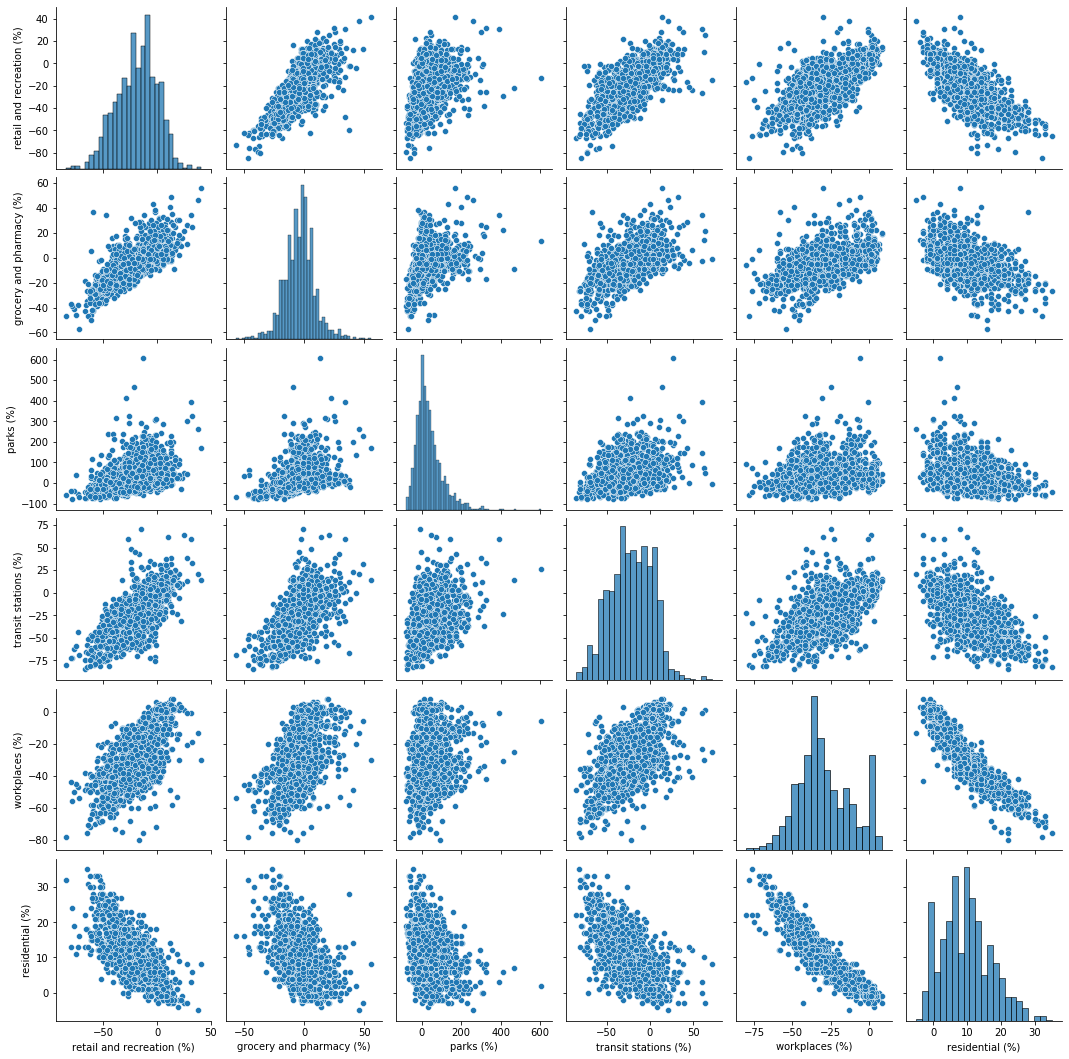

In [16]:
sns.pairplot(df_mobUS_clean.iloc[:, 6:-1].dropna().sample(1500))

In [19]:
df_mobUS_clean.iloc[:, 6:-1].sample(1500).corr()

,retail and recreation (%),grocery and pharmacy (%),parks (%),transit stations (%),workplaces (%),residential (%)
retail and recreation (%),1.000000,0.620664,0.350093,0.669844,0.581539,-0.707620
grocery and pharmacy (%),0.620664,1.000000,0.317805,0.599830,0.355034,-0.453072
parks (%),0.350093,0.317805,1.000000,0.298740,0.125442,-0.249038
transit stations (%),0.669844,0.599830,0.298740,1.000000,0.489067,-0.599363
workplaces (%),0.581539,0.355034,0.125442,0.489067,1.000000,-0.880820
residential (%),-0.707620,-0.453072,-0.249038,-0.599363,-0.880820,1.000000


Residential and workplaces percentages are highly correlated

In [264]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
slice_df = df_mobUS_clean[["workplaces (%)", "residential (%)"]].dropna()
X = pd.DataFrame(slice_df.loc[:, "workplaces (%)"])
X = np.asanyarray(X)
                 
y = slice_df.loc[:, "residential (%)"]
y = np.asanyarray(y)

reg_res = LinearRegression().fit(X, y)

print("coefs", reg_res.coef_[0], "intercept", reg_res.intercept_)
pred = np.around(reg_res.predict(X))
print("accuracy", r2_score(y, pred))

coefs -0.3573812356727654 intercept -1.4906842137620444
accuracy 0.7691142866307875


In [265]:
missing_res_data = (df_mobUS_clean["workplaces (%)"].isnull() == False) & df_mobUS_clean["residential (%)"].isnull()
X_work = df_mobUS_clean[missing_res_data]["workplaces (%)"].dropna()
missing_res_data.sum()

298528

In [266]:
X = pd.DataFrame(slice_df.loc[:, "residential (%)"])
X = np.asanyarray(X)
                 
y = slice_df.loc[:, "workplaces (%)"]
y = np.asanyarray(y)

reg_work = LinearRegression().fit(X, y)

print("coefs", reg_work.coef_[0], "intercept", reg_work.intercept_)
pred = np.around(reg_work.predict(X))
print("accuracy", r2_score(y, pred))

coefs -2.159343058476098 intercept -9.011404147895107
accuracy 0.7706565386779574


In [267]:
missing_work_data = (df_mobUS_clean["residential (%)"].isnull() == False) & df_mobUS_clean["workplaces (%)"].isnull()
X_res = df_mobUS_clean[missing_work_data]["residential (%)"].dropna()
missing_work_data.sum()

7963

In [268]:
X_work_in = np.asanyarray(pd.DataFrame(X_work))
y_res = np.around(reg_res.predict(X_work_in))

X_res_in = np.asanyarray(pd.DataFrame(X_res))
y_work = np.around(reg_res.predict(X_res_in))

index = list(df_mobUS_clean[missing_res_data].loc[:, "residential (%)"].index)
df_mobUS_clean.loc[index, "residential (%)"] = y_res

index = list(df_mobUS_clean[missing_work_data].loc[:, "workplaces (%)"].index)
df_mobUS_clean.loc[index, "workplaces (%)"] = y_work

In [284]:
df_mobUS_clean.to_csv(r"df_mobility_US_clean.csv", index = False, header = True)
df_mobUS_clean.head(5)

,country_region_code,country_region,sub_region_1,sub_region_2,census_fips_code,date,retail and recreation (%),grocery and pharmacy (%),parks (%),transit stations (%),workplaces (%),residential (%),weekend
0,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-15,5.0,7.0,NaN,NaN,-4.0,-0.0,1
1,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-16,0.0,1.0,-23.0,NaN,-4.0,-0.0,1
2,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-17,8.0,0.0,NaN,NaN,-27.0,5.0,0
3,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-18,-2.0,0.0,NaN,NaN,2.0,0.0,0
4,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-19,-2.0,0.0,NaN,NaN,2.0,0.0,0


In [270]:
df_mobUS_clean = pd.read_csv("df_mobility_US_clean.csv")
dates_list = list(df_mobUS_clean["date"].apply(lambda x: to_date(x)))[:]
df_mobUS_clean["date"] = dates_list

In [282]:
cols = ["retail and recreation (%)",
        "grocery and pharmacy (%)",
        "parks (%)",
        "transit stations (%)",
        "workplaces (%)",
        "residential (%)"]
cities = ["Houston County, TX", "Glades County, FL", "Hidalgo County, TX"]
selected_index = []
for city in cities:
    selected_index += list(df_mobUS_clean[df_mobUS_clean["sub_region_2"] == city].index)
print("number of elements", len(selected_index))

number of elements 718


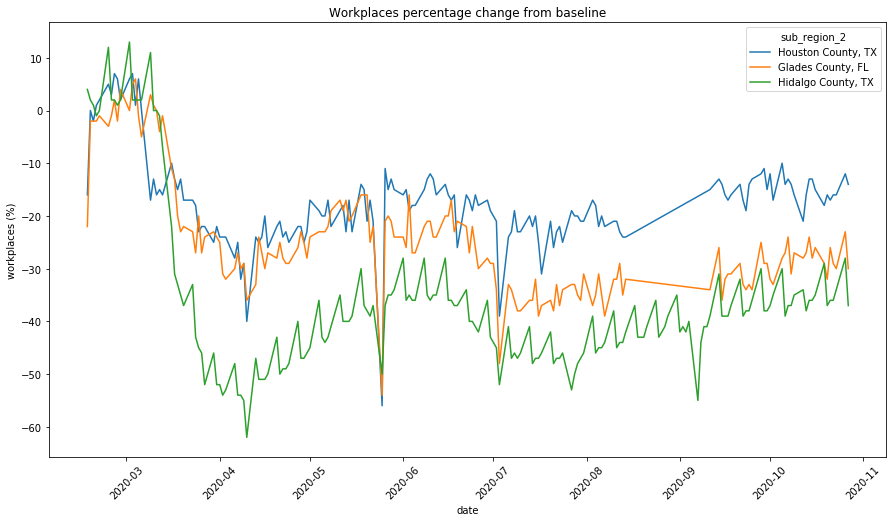

In [283]:
data = df_mobUS_clean.loc[selected_index, :]
data = data[data["weekend"] == 0]
plt.figure(figsize = (15, 8))
plt.title("Workplaces percentage change from baseline")
sns.lineplot(data = data, x = "date", y = "workplaces (%)", hue = "sub_region_2")
plt.xticks(rotation = 45)
plt.show()

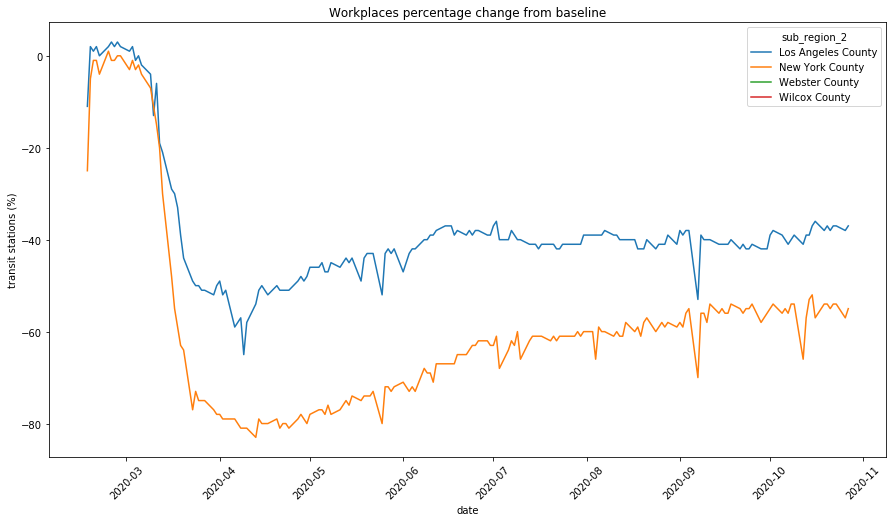

In [207]:
data = df_mobUS_clean.loc[selected_index, :]
data = data[data["weekend"] == 0]
plt.figure(figsize = (15, 8))
plt.title("Workplaces percentage change from baseline")
sns.lineplot(data = data, x = "date", y = "transit stations (%)", hue = "sub_region_2")
plt.xticks(rotation = 45)
plt.show()

In [112]:
df_mobUS_clean.isnull().any()

country_region_code          False
country_region               False
sub_region_1                 False
sub_region_2                 False
census_fips_code             False
date                         False
retail and recreation (%)     True
grocery and pharmacy (%)      True
parks (%)                     True
transit stations (%)          True
workplaces (%)                True
residential (%)               True
dtype: bool

# Unemployment data

In [36]:
df_unempl_raw = pd.read_csv("unemp_us.csv")
df_unempl_raw.head(5)

,Unnamed: 0,Initial Claims,Unnamed: 2,Unnamed: 3,Unnamed: 4,Continued Claims,Unnamed: 6,Unnamed: 7,Unnamed: 8,I.U.R,Unnamed: 10,Covered Employment
0,NaN,N.S.A,S.F.,S.A.,S.A. 4-Week,N.S.A,S.F.,S.A.,S.A. 4-Week,N.S.A,S.A.,NaN
1,01/07/1967,346000,166.5,208000,0,1594000,140.6,1134000,0,,,
2,01/14/1967,334000,161.5,207000,0,1563000,139.7,1119000,0,,,
3,01/21/1967,277000,127.8,217000,0,1551000,138.6,1119000,0,,,
4,01/28/1967,252000,123.8,204000,209000,1533000,139,1103000,1118750,,,


In [ ]:
cd